# SIT742: Modern Data Science 
**(2020 Assessment Task 01: Exploration for Data Scientists Survey Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Muhammad Ahsan Asif
- Student ID: 218606833
- Email: maasi@deakin.edu.au
- Lab Session and Tutor (for on campus students): Wednesday 3-4pm


---

## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 

In this task, you will need to 

- **Part 1**: Given the following two data sets, you are required to finish some required analysis, with the exploreation data analytics skills as well as visuilization skills
     - [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv): Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.     
     - [ConversionRates.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv): Currency conversion rates to USD. 
- **Part 2**: Given the following data set, you are required to find out top keywords for hiring the data scientists. 
    - [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv): Data scientists job advertising in US with job descriptions, from JobPikr.


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## Part 1 - What we could know about the Data Scientists? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***


In [0]:
!pip install wget

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import wget
import seaborn as sns # you can use other packages such as matplotlib too
sns.set(style="whitegrid")

In [0]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load MCQResponses.csv into dataframe df_demog, and check the data statistics and general infommation by printing its top 5 rows.
</div>

In [224]:
#Checking the data statistitcs and general information of the dataframe

df_demog = pd.read_csv('MCQResponses.csv')
df_demog.head(5)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


<div class="alert alert-block alert-info">

**Code**: 
    Check which columns have NAs (don't remove them now), and for each of those columns, display how many records with values (namely, no NULL values)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.A** Please include your result for this coding task into your report, with proper section title '1.0.A'.
</div>
    </div>




In [227]:
# Columns having null values or not

df_demog.isnull().any()

GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CodeWriter                      False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
FormalEducation                 False
MajorSelect                      True
FirstTrainingSelect              True
CompensationAmount              False
CompensationCurrency            False
JobSatisfaction                  True
dtype: bool

In [226]:
#Number of null values in each column

df_demog.isnull().sum()

GenderSelect                      0
Country                           0
Age                               0
EmploymentStatus                  0
CodeWriter                        0
CurrentJobTitleSelect             0
TitleFit                         76
CurrentEmployerType              52
MLToolNextYearSelect            121
MLMethodNextYearSelect          157
LanguageRecommendationSelect     99
FormalEducation                   0
MajorSelect                     375
FirstTrainingSelect               3
CompensationAmount                0
CompensationCurrency              0
JobSatisfaction                  10
dtype: int64

<div class="alert alert-block alert-info">

**Code**: 
    Select the users whose current job title is 'Data Scientist', and store into variable df_demog_ds    

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.B** Please include your result of `how many Data Scientists?' into your report, with proper section title  '1.0.B'.
</div>
</div>




In [228]:
#Storing the Data Scientists information into a new data frame

df_demog_ds = df_demog[df_demog['CurrentJobTitleSelect'] == 'Data Scientist']

#Number of rows in the dataframe

df_demog_ds['CurrentJobTitleSelect'].count()


1263

### 1.1. Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


<div class="alert alert-block alert-info">

**Code**: 
    Plot and display as text output the number and percentage of data scientist with each type of formal education. 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1** Please include your running result of this coding task into your report, with proper section title  '1.1'.
</div>
</div>

In [0]:
#Total number of Data scientists according to their formal education

df_demog_ds['FormalEducation'].value_counts()

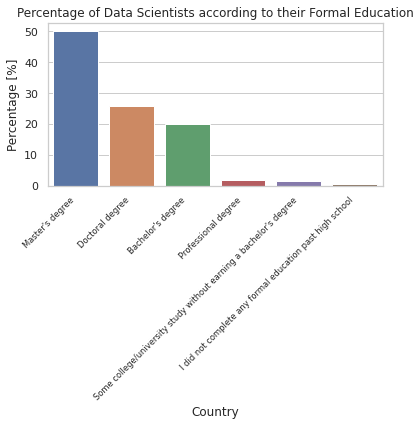

In [139]:
#Plotting the 'percentage' of data scientists according to their formal education

#Making a new df to convert the Formal Education values into percentage

df_percentage = df_demog_ds['FormalEducation'].value_counts(normalize = True)[:]*100

#Plotting the figure ( Plot 1 )

plt.figure(figsize = (6,3))
chart = sns.barplot(df_percentage.index,df_percentage)
plt.title('Percentage of Data Scientists according to their Formal Education')
plt.xlabel('Country')
plt.ylabel('Percentage [%]')

#Setting the x tick labels not to overlap each other

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'
);

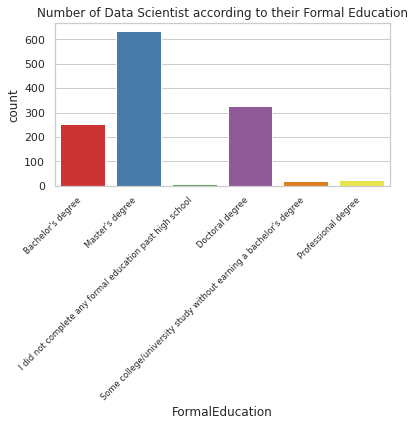

In [230]:
#Plotting the 'number' of data scientists with each type of formal education
#( Plot 2 )

plt.figure(figsize=(6,3))

chart = sns.countplot(
    data = df_demog_ds,
    x = 'FormalEducation',
    palette = 'Set1'  
)

#Setting the x tick labels not to overlap each other

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'
)

plt.title('Number of Data Scientist according to their Formal Education');

### 1.2. Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

First of all, you need to merge the multiple choice data with the *ConversionRates.csv* by using the compensation currency and originCountry respectively. And then you will need to multiply the compensation amount with exchangeRateAUS to have the Australian dollors.

In [0]:
#Getting the conversion rates in a dataframe

df_conversion_rates = pd.read_csv('ConversionRates.csv')

#Dropping an unused column before merge

df_conversion_rates.drop('Unnamed: 0',axis = 1,inplace = True)
df_conversion_rates.head()

<div class="alert alert-block alert-info">

**Code**: 
Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.A** In your report's section '1.2.A', answer what is the maximum and the median salary in AUD (this is for all respondents). 
</div>
</div>


In [0]:
#Merging the two dataframes based on the Compensation Currency and Origin Country

new_df = pd.merge(left=df_demog_ds, right=df_conversion_rates, left_on='CompensationCurrency', right_on='originCountry')

#Making a new column in terms of Australian compensation by multiplying the respective columns

new_df['Compensation (AUD)'] = new_df['CompensationAmount']*new_df['exchangeRate']
new_df.head()

In [82]:
#Maximum Salary in AUD

new_df['Compensation (AUD)'].max()

595884.6

In [83]:
#Median Salary in AUD

new_df['Compensation (AUD)'].median()


71268.06

<div class="alert alert-block alert-info">

**Code**: 
Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.
   
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.B** In your report's section '1.2.B', answer what is the maximum and median salary in AUD for Australian respondents, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [0]:
# Getting the Australian respondents into a new dataframe

df_australia = new_df[new_df['Country'] == 'Australia']

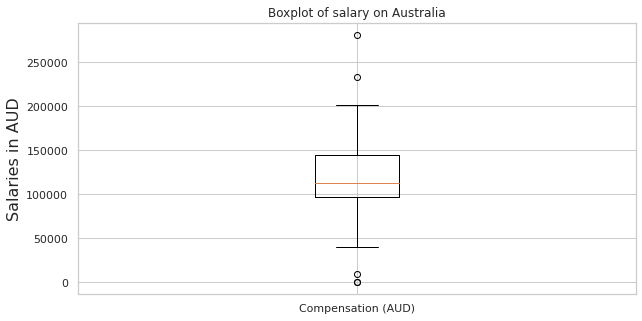

In [233]:
#Plotting a box plot for the australian respondants for their salaries in AUD

fig, ax = plt.subplots(figsize = (10, 5))

ax.boxplot(df_australia['Compensation (AUD)'], labels = ['Compensation (AUD)'])
ax.set_ylabel('Salaries in AUD', fontsize = 16)
ax.set_title('Boxplot of salary on Australia');

In [86]:
#Maximum Salaries in AUD for Australian respondants 

df_australia['Compensation (AUD)'].max()

280808.5

In [90]:
#Median Salaries in AUD for Australian respondants 

round(df_australia['Compensation (AUD)'].median())

112323

<div class="alert alert-block alert-info">

**Code**: 
There are some outliers in the Australian salary plot. You are required to filter the salary of Australian respondents by removing any below 40,000 or above 250,000. 

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.C** In your report's section '1.2.C', answer what is the new maximum and median salary in AUD for Australian respondents after filtering, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [0]:
# Filtering the outliers 

df_new_australia = df_australia[df_australia['Compensation (AUD)'] > 40000]
df_new_australia = df_new_australia[df_new_australia['Compensation (AUD)'] < 250000]
df_new_australia.head()

In [122]:
#New maximum Salary in AUD for Australian respondants

round(df_new_australia['Compensation (AUD)'].max())

232670

In [123]:
#New median Salary in AUD for Australian respondants

round(df_new_australia['Compensation (AUD)'].median())

117940

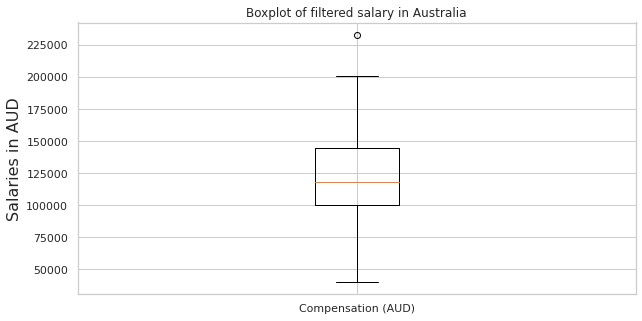

In [146]:
# Plotting a box plot for the australian respondants for their salaries in AUD

fig, ax = plt.subplots(figsize = (10, 5))

ax.boxplot(df_new_australia['Compensation (AUD)'], labels = ['Compensation (AUD)'])
ax.set_ylabel('Salaries in AUD', fontsize=16)
ax.set_title('Boxplot of filtered salary in Australia');

### 1.3. Exploring the data scientist Demographics
<a id="demographics"></a>
***

#### 1.3.1 Age
<a id="age"></a>
You will need to build a boxplot to explore the age of all data scientists. 
Your plot must have a label for each axis, a tittle and also show the outliers.

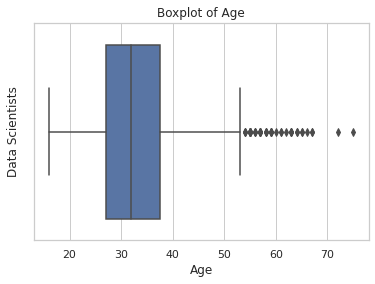

In [129]:
# Boxplot of all the ages of the data scientists

ax = sns.boxplot(x = df_demog_ds['Age'])

ax.set_ylabel('Data Scientists')
ax.set_title('Boxplot of Age');

<div class="alert alert-block alert-info">

**Code**: 
        <ol>
        <li> Calculate the five number summary descriptive statistics for age as shown on the boxplot, as well as the mean. Please round your mean to integer.</li>
        <li> Regardless of the errors that the data show, we are interested in working-age data scientists, how many aged between 24 and 60. </li>
        <li> How many respondents were under 18?</li>
    </ol>
    

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.A** In your report's section '1.3.A', answer 
        <ol>
        <li> What is the mean age of all data scientists? </li>
        <li> What is the median age of all data scientists? </li>
        <li> how many data scientists aged between 24 and 60</li>
        <li> how many respondents were under 18? </li>
    </ol>
</div>
</div>







In [237]:
#Descriptive Statistics in integers

df_demog_ds['Age'].describe().astype(int)

count    1263
mean       33
std         8
min        16
25%        27
50%        32
75%        37
max        75
Name: Age, dtype: int64

In [235]:
#Data scientists aged between 24 and 60

df_demog_ds[(df_demog_ds['Age'] <= 60) & (df_demog_ds['Age'] >= 24)].shape[0]

1188

In [238]:
#Respondants under 18

df_demog[df_demog['Age'] < 18 ].shape[0]

3

#### 1.3.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


<div class="alert alert-block alert-info">

**Code**: 
Plot the gender distribution of the data scientist users using a bar chart. 
</div>


In [0]:
# Bar chart of Data scientists gender distribution

ax = sns.countplot(df_demog_ds['GenderSelect'])

ax.set_xlabel('Genders')
plt.title('Bar chart of Gender');


Now let's see if any relationship between gender and age

Create a box plot showing the age of all the data scientists according to gender (men, women and other identity).

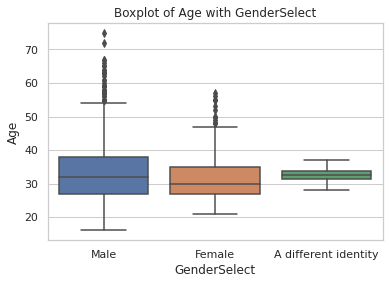

In [243]:
#Boxplot of Age with genders 

plt.title('Boxplot of Age with GenderSelect')

sns.boxplot(x ='GenderSelect',y = 'Age',data = df_demog_ds);


<div class="alert alert-block alert-info">

**Code**: 
You are required to use the barchart to show the percentage of men, women and other identity.
    
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.B** In your report's section '1.3.B', include the bar chart generated from your code.
</div>
</div>

In [0]:
#Plotting the 'percentage' of data scientists according to their Gender

#Making a new df to convert the Gender Categories values into percentage

df_percentage_gender = df_demog_ds['GenderSelect'].value_counts(normalize = True)[:]*100

#Plotting the figure 

plt.figure(figsize = (6,3))

chart = sns.barplot(df_percentage_gender.index,df_percentage_gender)
plt.title('Percentage of Data Scientists according to their Gender')
plt.xlabel('Country')
plt.ylabel('Percentage [%]');



#### 1.3.3 Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

<div class="alert alert-block alert-info">

**Code**: 
Find the top 5 countries of data scientists.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.C** In your report's section '1.3.C', answer what are those top 5 countries and their corresponding number of data scienists
</div>
</div>

In [245]:
#Top five countries and their number of Data Scientist

df_country = df_demog_ds['Country'].value_counts().head(5)
df_country

United States     414
India             111
France             60
United Kingdom     55
Germany            50
Name: Country, dtype: int64

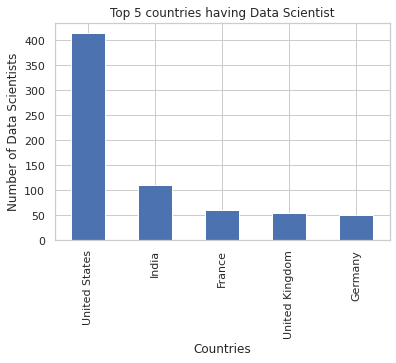

In [247]:
# Bar plot of top 5 countires and their corresponding number of data scientist

df_demog_ds['Country'].value_counts().head(5).plot.bar()

plt.title('Top 5 countries having Data Scientist')
plt.ylabel('Number of Data Scientists')
plt.xlabel('Countries');

<div class="alert alert-block alert-info">

**Code**: 
Generate the distribution of top 5 countries of data scientists, using percentage barchart. You can not mannually input the name of top 5 countries (your code should not contain any name of the top 5 countries), and you are required to use python subset functions or many other functions.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.D** In your report's section '1.3.D', including the percentage barchart of those top 5 countries. Here the percentage is calculated based on all countries, not for those top 5 countries. So the sum of top 5 countries' percentage should be less than 1.
</div>
</div>

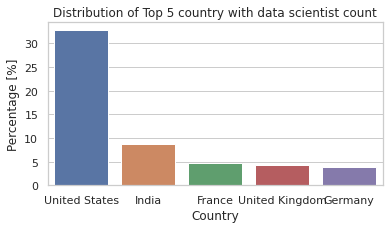

In [249]:
#Calculating percentage based on all countries

df_top5_country = df_demog_ds['Country'].value_counts(normalize = True)[:5]*100

#Plotting the arplot in % to show the distribution of top 5 countries of data scientists

plt.figure(figsize = (6,3))

sns.barplot(df_top5_country.index,df_top5_country)
plt.title('Distribution of Top 5 country with data scientist count')
plt.xlabel('Country')
plt.ylabel('Percentage [%]');

Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

<div class="alert alert-block alert-info">

**Code**: 
You are required to output the mean and median age for each gender for the United States, India, Australia, Pakistan


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.E** In your report's section '1.3.E', including the results of above coding task.
</div>
</div>




In [251]:
#Finding the mean & median for the genders in United States, India, Australia, Pakistan

#United States

print('UNITED STATES\n')
print('Gender Mean\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'United States')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].mean()))
print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'United States')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].mean()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'United States')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].mean())

print('\nGender Median\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'United States')&(df_demog_ds['GenderSelect']=='Male')]['Age'].median()))
print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'United States')&(df_demog_ds['GenderSelect']=='Female')]['Age'].median()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'United States')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].median())

# India

print('\nINDIA\n')
print('Gender Mean\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'India')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].mean()))
print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'India')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].mean()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'India')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].mean())

print('\nGender Median\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'India')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].median()))
print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'India')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].median()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'India')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].median())

# Australia

print('\nAUSTRALIA\n')
print('Gender Mean\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'Australia')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].mean()))
print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'Australia')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].mean()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'Australia')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].mean())

print('\nGender Median\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country']=='Australia')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].median()))
print('Female :',round(df_demog_ds[(df_demog_ds['Country']=='Australia')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].median()))
print('A different identity',df_demog_ds[(df_demog_ds['Country']=='Australia')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].median())

# Pakistan
# Didn't find the mean and median for female as it had nan values, causing an error, and there were no instructions given for that in the question to deal with it

print('\nPAKISTAN\n')
print('Gender Mean\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'Pakistan')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].mean()))
#print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'Pakistan')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].mean()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'Pakistan')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].mean())

print('\nGender Median\n')
print('Male : ',round(df_demog_ds[(df_demog_ds['Country'] == 'Pakistan')&(df_demog_ds['GenderSelect'] == 'Male')]['Age'].median()))
#print('Female :',round(df_demog_ds[(df_demog_ds['Country'] == 'Pakistan')&(df_demog_ds['GenderSelect'] == 'Female')]['Age'].median()))
print('A different identity',df_demog_ds[(df_demog_ds['Country'] == 'Pakistan')&(df_demog_ds['GenderSelect'] == 'A different identity')]['Age'].median())

UNITED STATES

Gender Mean

Male :  36
Female : 33
A different identity 31.0

Gender Median

Male :  33
Female : 31
A different identity 31.0

INDIA

Gender Mean

Male :  30
Female : 29
A different identity nan

Gender Median

Male :  28
Female : 27
A different identity nan

AUSTRALIA

Gender Mean

Male :  35
Female : 33
A different identity nan

Gender Median

Male :  34
Female : 31
A different identity nan

PAKISTAN

Gender Mean

Male :  32
A different identity nan

Gender Median

Male :  27
A different identity nan


## Part 2 - Data Science Job Advertising Data

In this part, you are required to use the text processing skills to find out the insights in data science job adverising Data.

### 2.1. Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, you will need to load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [174]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df_text = pd.read_csv('JobPostings.csv')
df_text.head()

<div class="alert alert-block alert-info">

**Code**: 
You are required to extract the token and append them into the list 'token'.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.A** In your report's section '2.1.A', including your code of this task. You can copy and paster your completed code in the following cell
</div>
</div>


In [0]:
lower = []
for item in df_text['job_description']:
    lower.append(item.lower())           

tokens = []

#Tokeninzing based on whitespaces

tokenizer = RegexpTokenizer(r'\W+', gaps=True) 
tokens = tokenizer.tokenize(str(lower))
tokens

Secondly, 

<div class="alert alert-block alert-info">

**Code**: 
You are required to find out the words freqency which is more than 6000 in the job descriptions. (Please use stopwords at beginning)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.B** In your report's section '2.1.B', list those words with frequency > 6000.
</div>
</div>




In [0]:
#Defining stop words

stop_words = set(stopwords.words('english')) 

#Filtering the stop words from the tokens

filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_tokens

In [0]:
#Printing the fitlered tokens which have a frequency greater than 6000

freqs = nltk.FreqDist(filtered_tokens)

freq6000 = dict(filter(lambda x: x[1] > 6000,freqs.items()))
freq6000

Then,

<div class="alert alert-block alert-info">

**Code**: 
You are required to sort and display the top 10 high frequency words in 'freq6000'

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.C** In your report's section '2.1.C', list those top 10 words
</div>
</div>






In [0]:
#Code to sort and display the top 10 high fequency words in 'freq6000'

freq_sorted = sorted(freq6000.items(),key = lambda x: x[1],reverse = True)
print(dict(freq_sorted[:10]))

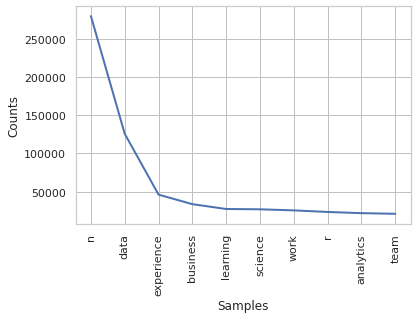

In [220]:
#Plotting the top ten words

freqs.plot(10)
plt.show();

Finally,

<div class="alert alert-block alert-info">

**Code**: 
You are required to carry out one more analytics on this data set, and implement it below.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.D** In your report's section '2.1.D', describe your self-defined text analysis task, and the discovery from your analysis.
</div>
</div>







In [0]:
from nltk.stem import PorterStemmer

#Using the porter stemmer for stemming

stemmer = PorterStemmer()
['{0} -> {1}'.format(w, stemmer.stem(w)) for w in filtered_tokens]